In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from keras_preprocessing.image import ImageDataGenerator

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping

## Previewing the data

In [2]:
inputs= np.load('X.npy')
outputs= np.load('y.npy')

In [3]:
inputs.shape

(5547, 50, 50, 3)

In [4]:
print(inputs[0, :, :, :])

[[[226 164 206]
  [224 154 196]
  [225 175 211]
  ...
  [240 221 237]
  [232 184 214]
  [243 213 235]]

 [[217 142 188]
  [221 130 179]
  [224 150 196]
  ...
  [227 170 204]
  [229 180 215]
  [236 212 232]]

 [[237 178 212]
  [229 157 199]
  [218 125 175]
  ...
  [221 184 217]
  [190 153 193]
  [227 164 208]]

 ...

 [[217 145 192]
  [214 129 184]
  [212 129 183]
  ...
  [194 122 185]
  [204 143 193]
  [189 129 188]]

 [[218 144 192]
  [213 128 185]
  [208 121 171]
  ...
  [136  79 145]
  [184 111 174]
  [188 112 176]]

 [[212 125 181]
  [211 136 181]
  [220 162 206]
  ...
  [127  90 152]
  [213 167 202]
  [215 180 211]]]


In [5]:
print(outputs.shape, outputs)

(5547,) [0 0 0 ... 1 1 1]


In [6]:
np.unique(outputs, return_counts=True)

(array([0, 1], dtype=int64), array([2759, 2788], dtype=int64))

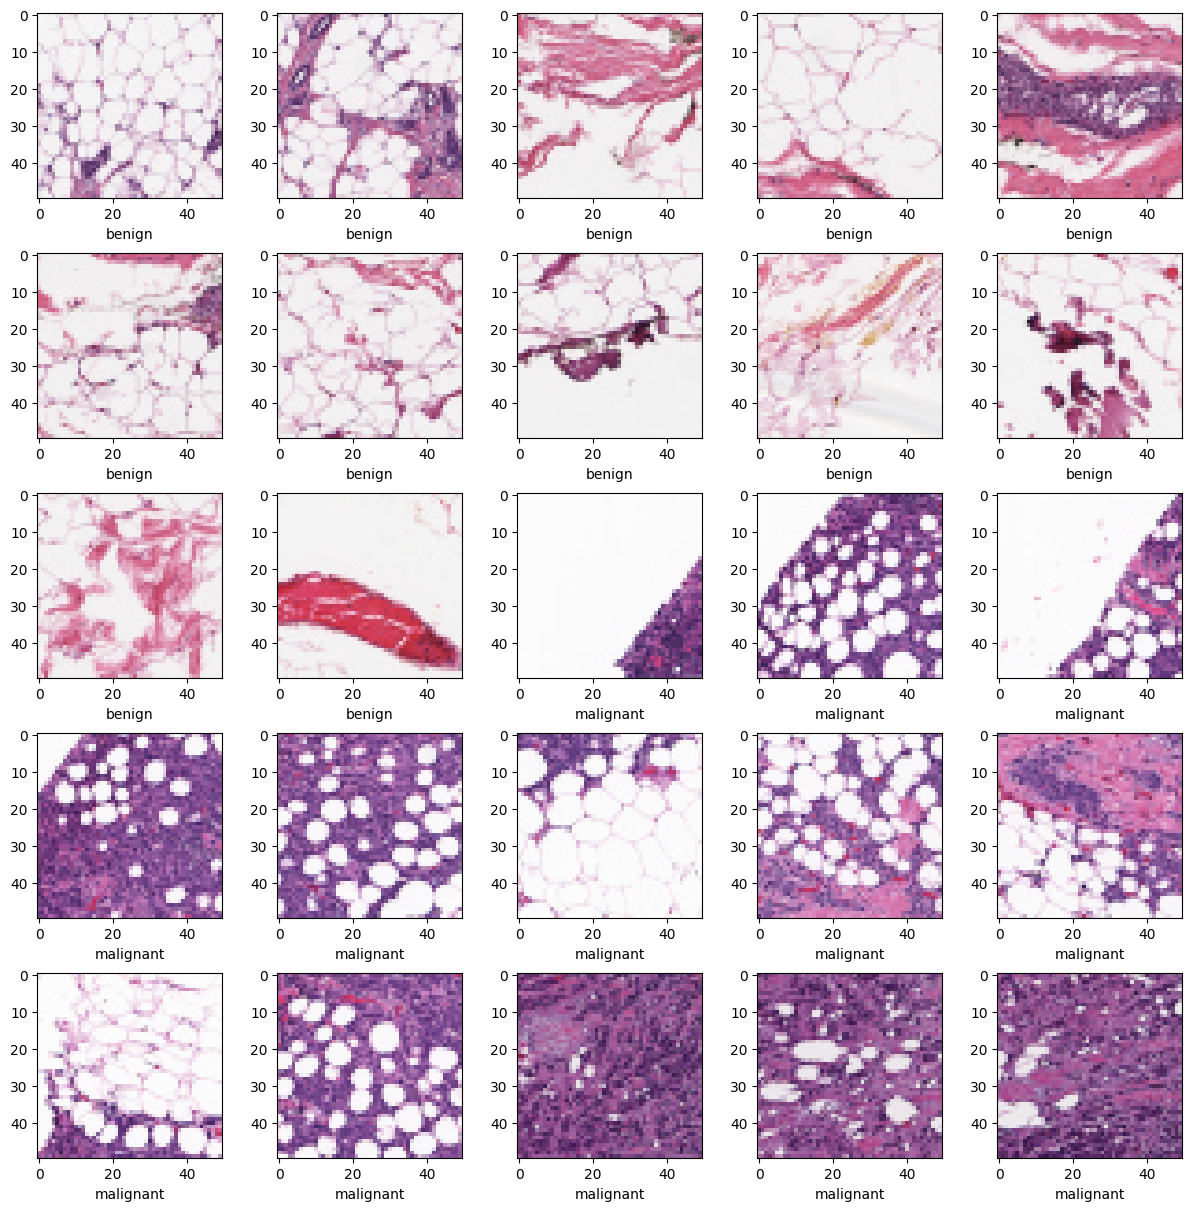

In [7]:
inputs_preview= inputs[2747:2778]
outputs_preview= outputs[2747:2778]

plt.figure(figsize=(12,12), layout='constrained')
for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)
    plt.imshow(inputs_preview[i])
    plt.xlabel(['benign' if y == 0 else 'malignant' for y in list(outputs_preview)][i])
plt.show()

In [8]:
np.set_printoptions(threshold=sys.maxsize)

In [9]:
print(outputs)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [10]:
np.set_printoptions(threshold= False)

In [11]:
np.unique(outputs, return_counts=True)

(array([0, 1], dtype=int64), array([2759, 2788], dtype=int64))

In [12]:
outputs[2758], outputs[2759]

(0, 1)

In [13]:
benign= inputs[:2759]
malignant= inputs[2759:]

In [14]:
benign_list= []

## Image augmentation

In [15]:
def brightness(array, list):
    for element in array:
        image= np.expand_dims(element, 0)
        datagen = ImageDataGenerator(brightness_range=[0.7,1.3])
        iterator = datagen.flow(image, batch_size=1)
        # generate batch of images
        
        for i in range(3):
            list.append(next(iterator)[0].astype('uint8'))

In [16]:
def zoom(array, list):
    for element in array:
        image= np.expand_dims(element, 0)
        datagen = ImageDataGenerator(zoom_range=0.3)
        iterator = datagen.flow(image, batch_size=1)
        # generate batch of images
        
        for i in range(3):
            list.append(next(iterator)[0].astype('uint8'))

In [17]:
brightness(benign, benign_list)

len(benign_list)

8277

In [18]:
zoom(benign, benign_list)

len(benign_list)

16554

In [19]:
benign_array= np.array(benign_list)
benign_array.shape

(16554, 50, 50, 3)

In [20]:
benign_x= np.concatenate((benign, benign_array), axis=0)
benign_x.shape

(19313, 50, 50, 3)

In [21]:
malignant_list= []

In [22]:
brightness(malignant, malignant_list)

len(malignant_list)

8364

In [23]:
zoom(malignant, malignant_list)

len(malignant_list)

16728

In [24]:
malignant_array= np.array(malignant_list)
malignant_array.shape

(16728, 50, 50, 3)

In [25]:
malignant_x= np.concatenate((malignant, malignant_array), axis=0)
malignant_x.shape

(19516, 50, 50, 3)

In [26]:
x_= np.concatenate((benign_x, malignant_x), axis=0)
x_.shape

(38829, 50, 50, 3)

In [27]:
benign_y= np.zeros(19313)
malignant_y= np.ones(19516)
y_= np.concatenate((benign_y, malignant_y), axis=0)

In [28]:
list(y_[:20])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [29]:
x, y = shuffle(x_, y_, random_state=17)

In [30]:
list(y[:20])

[0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0]

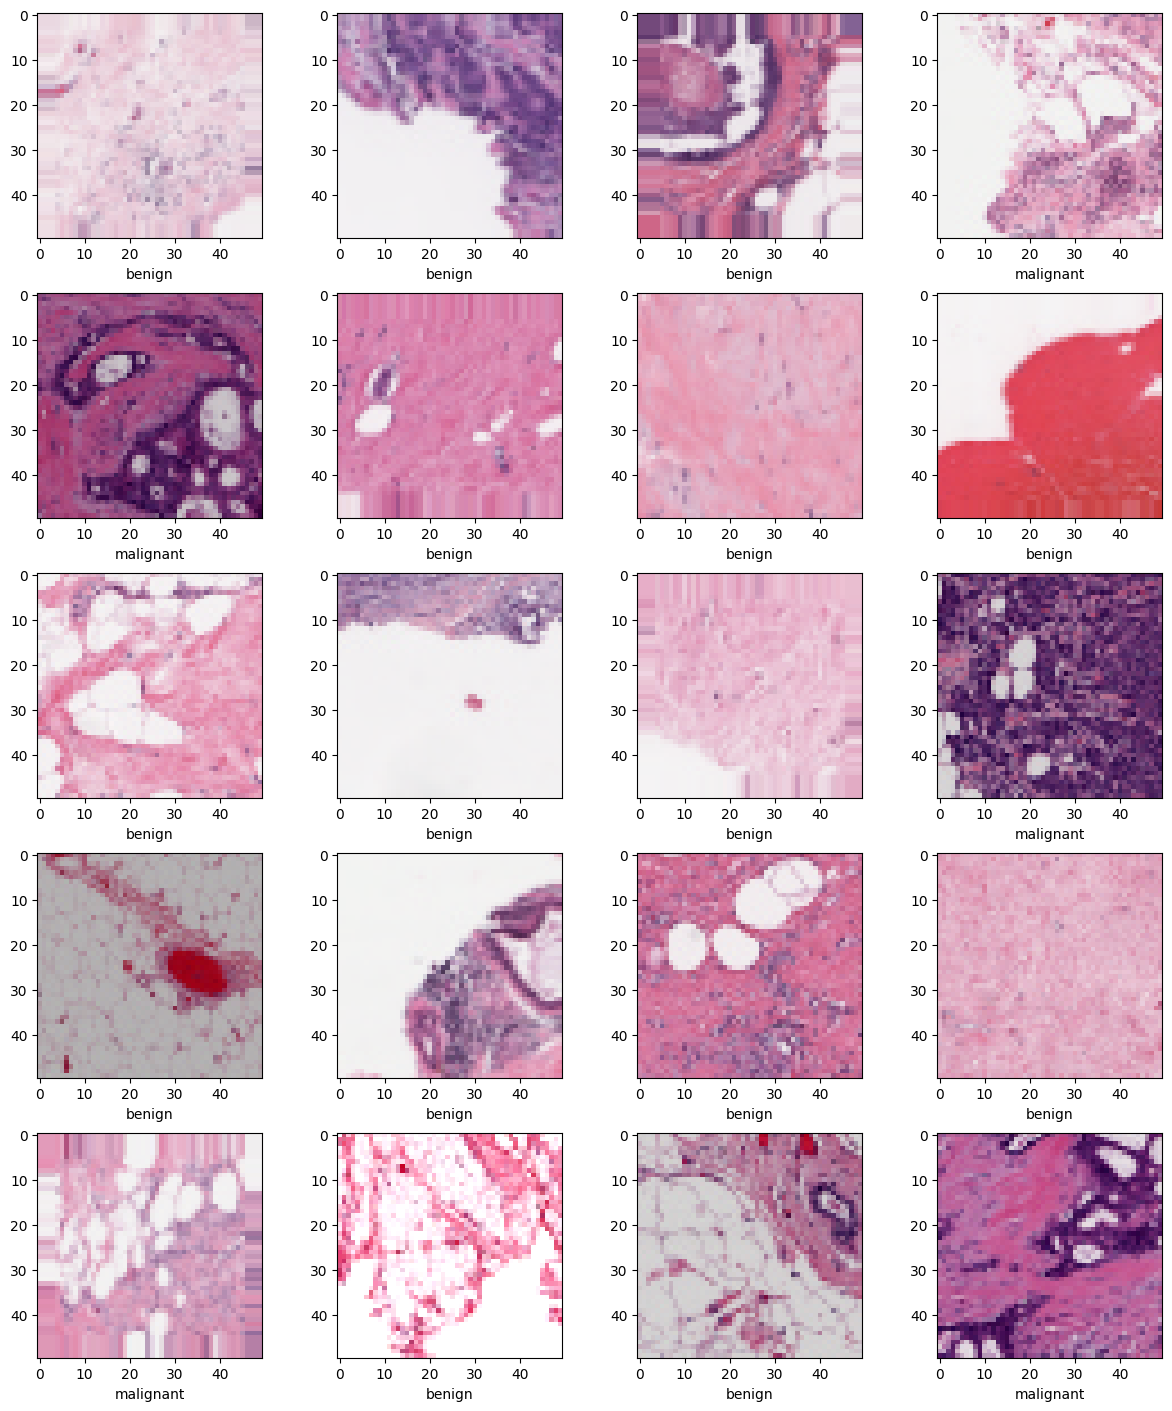

In [31]:
x_preview= x[:20]
y_preview= y[:20]

plt.figure(figsize=(12,14), layout='constrained')
for i in range(20):
    plt.subplot(5,4,i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)
    plt.imshow(x_preview[i])
    plt.xlabel(['benign' if y == 0 else 'malignant' for y in list(y_preview)][i])
plt.show()

In [32]:
x = x/255.0

In [33]:
x.shape

(38829, 50, 50, 3)

## Model training

In [34]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state= 17)

In [35]:
x_train.shape, x_test.shape

((34946, 50, 50, 3), (3883, 50, 50, 3))

In [36]:
model = Sequential()

#conv layer 1
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (50, 50, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

#conv layer 2
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten(input_shape=(50, 50, 3)))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [39]:
callback = EarlyStopping(monitor='val_loss', patience=3)

In [40]:
history= model.fit(x_train, y_train, epochs=20, batch_size=500, 
                   validation_split=0.1, callbacks= callback)

Epoch 1/20
63/63 [==============================] - 34s 532ms/step - loss: 0.6175 - accuracy: 0.6605 - auc: 0.7198 - val_loss: 0.5732 - val_accuracy: 0.7193 - val_auc: 0.8086
Epoch 2/20
63/63 [==============================] - 33s 527ms/step - loss: 0.5443 - accuracy: 0.7362 - auc: 0.8005 - val_loss: 0.5490 - val_accuracy: 0.7356 - val_auc: 0.8267
Epoch 3/20
63/63 [==============================] - 33s 530ms/step - loss: 0.5169 - accuracy: 0.7524 - auc: 0.8239 - val_loss: 0.5238 - val_accuracy: 0.7448 - val_auc: 0.8315
Epoch 4/20
63/63 [==============================] - 33s 525ms/step - loss: 0.4990 - accuracy: 0.7623 - auc: 0.8377 - val_loss: 0.5001 - val_accuracy: 0.7657 - val_auc: 0.8469
Epoch 5/20
63/63 [==============================] - 33s 524ms/step - loss: 0.4827 - accuracy: 0.7728 - auc: 0.8492 - val_loss: 0.4771 - val_accuracy: 0.7708 - val_auc: 0.8556
Epoch 6/20
63/63 [==============================] - 33s 526ms/step - loss: 0.4642 - accuracy: 0.7819 - auc: 0.8619 - val_loss

Text(0, 0.5, 'Loss')

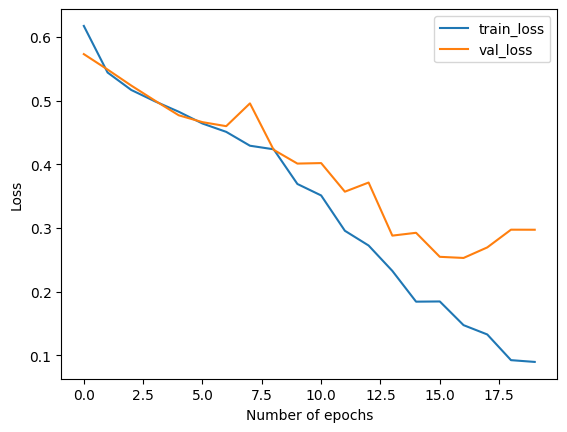

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

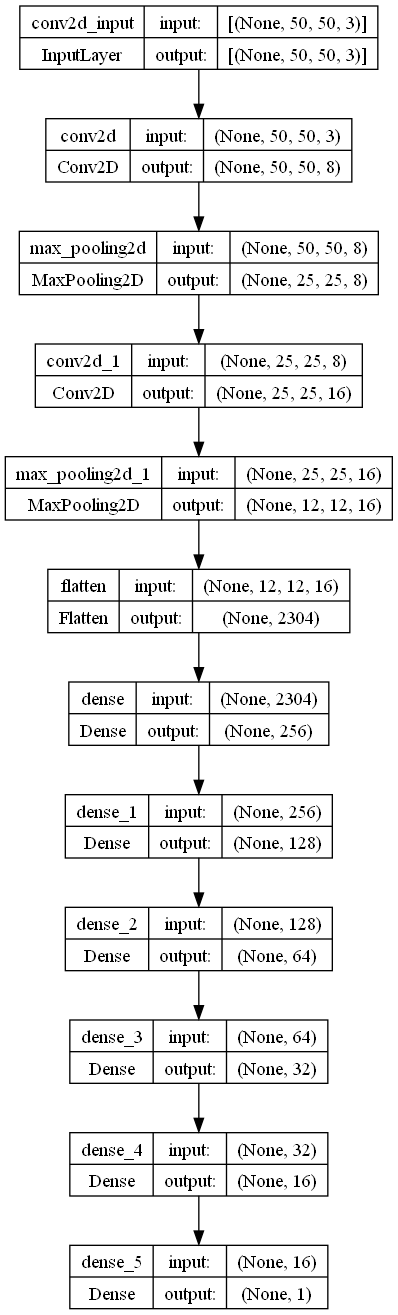

In [43]:
from keras.utils import plot_model

dot_img_file = 'model.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

In [44]:
model.evaluate(x_test, y_test)

122/122 [==============================] - 2s 14ms/step - loss: 0.3063 - accuracy: 0.9039 - auc: 0.9603


[0.3062742352485657, 0.9039402604103088, 0.9602550268173218]

## Model performance

In [45]:
y_pred = model.predict(x_test)

122/122 [==============================] - 2s 13ms/step


In [46]:
print(y_pred)

[[9.9999994e-01]
 [2.0728312e-03]
 [4.2014362e-04]
 ...
 [4.9896077e-03]
 [9.8617715e-01]
 [4.3406457e-05]]


In [47]:
class_label= np.rint(y_pred)

In [48]:
np.unique(class_label, return_counts= True)

(array([0., 1.], dtype=float32), array([2098, 1785], dtype=int64))

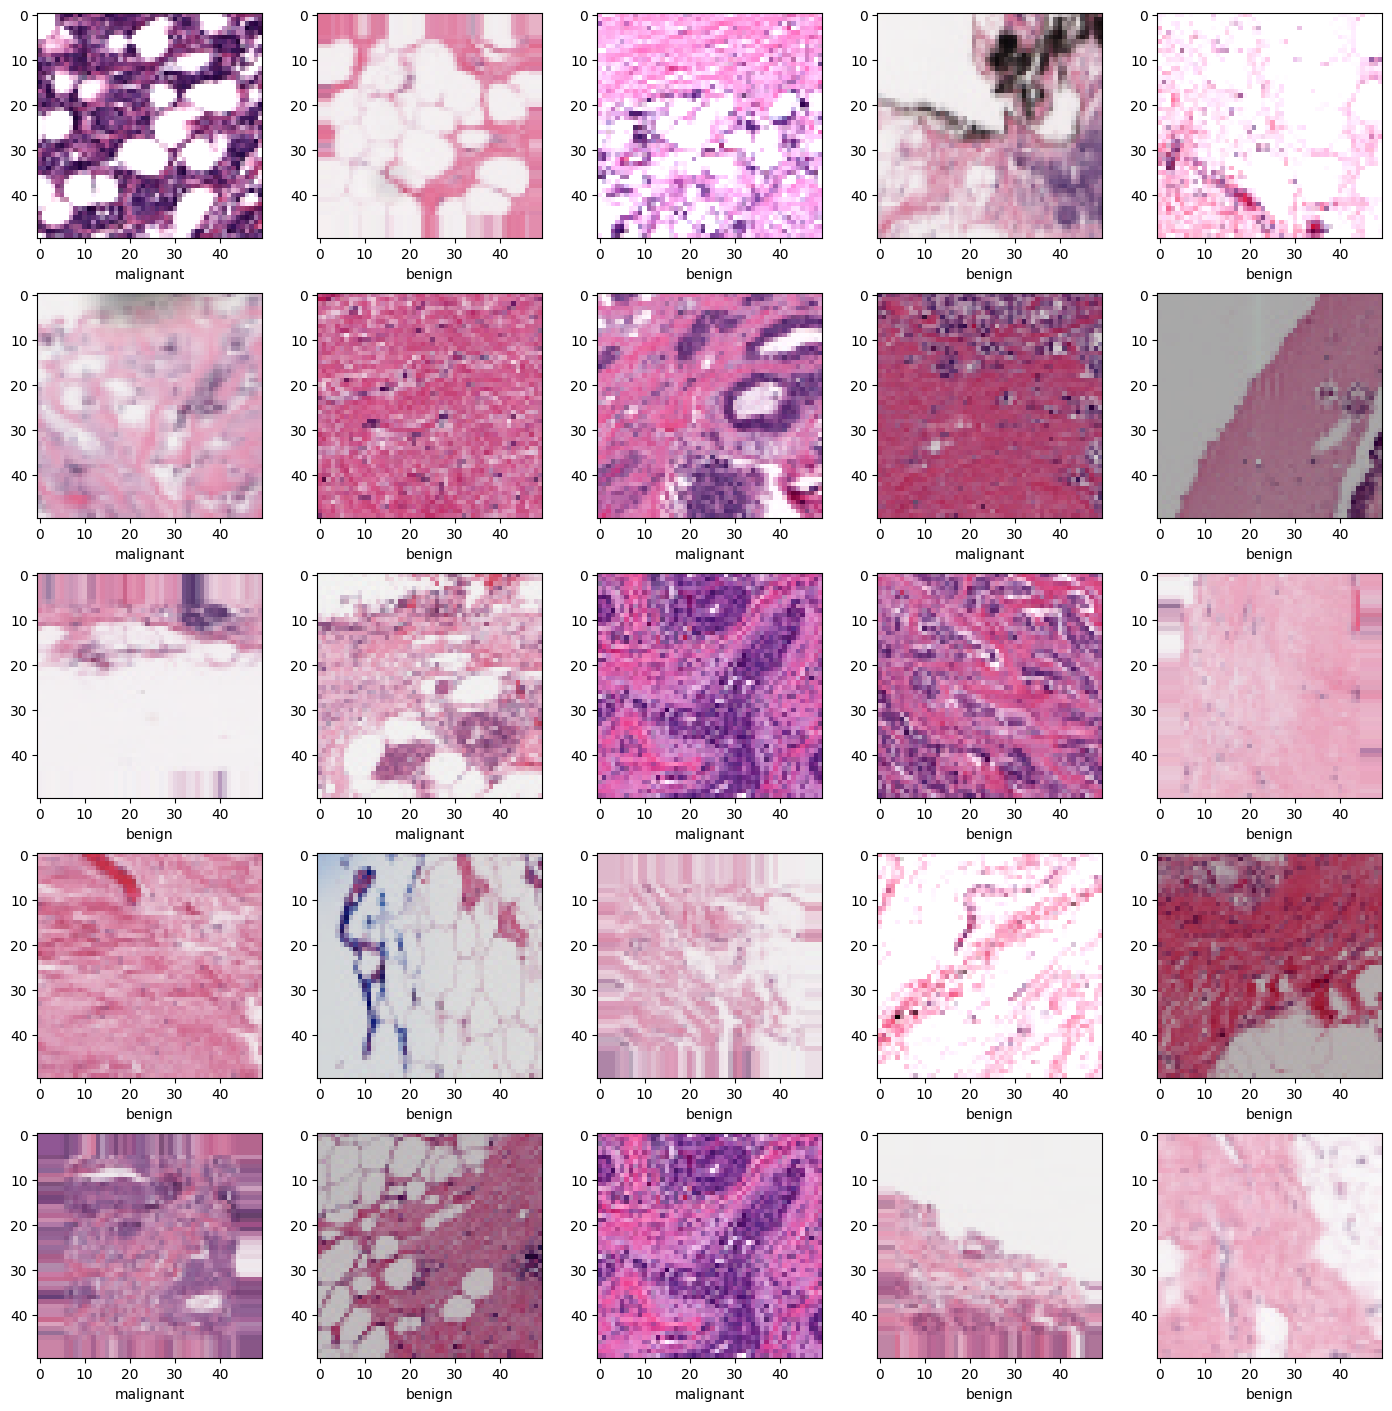

In [49]:
plt.figure(figsize=(14,14), layout='constrained')
for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(['benign' if v == 0 else 'malignant' for v in list(class_label)][i])
plt.show()

In [50]:
print(classification_report(y_test, class_label))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      1943
         1.0       0.94      0.86      0.90      1940

    accuracy                           0.90      3883
   macro avg       0.91      0.90      0.90      3883
weighted avg       0.91      0.90      0.90      3883



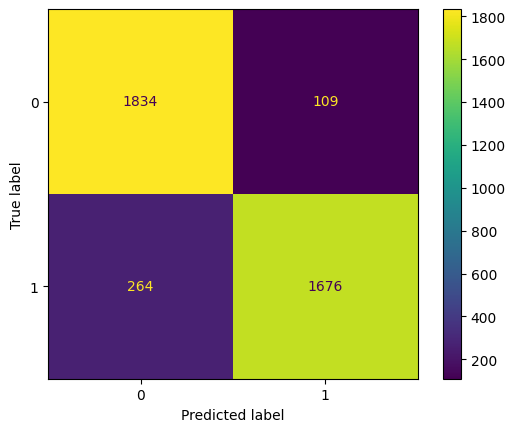

In [51]:
cf= confusion_matrix(y_test, class_label)

matrix= ConfusionMatrixDisplay(cf)
matrix.plot()
plt.show()